**PROJECT:** "Fraud prevention and detection"

**GROUP N°:** 8 - *MAPA, Connecting Ideas*

**MEMBERS:** Mariana Uro - Pablo Tamayo

**OBJECTIVE:** The project’s objetive is predict frauds over distance of financial transactions​.

**DESCRIPTION OF THE VARIABLES:**

    distance_from_home: the distance from home to where the transaction took place
    distance_from_last_transaction: the distance from the last transaction 
    ratio_to_median_purchase_price: relationship between of the purchase Price and the average purchase price
    repeat_retailer: the transaction from the retailer.
    used_chip: is the transaction that was made using chip (credit card).
    used_pin_number: is the transaction that was made using PIN number.
    online_order: the transaction is an online order.
    fraud: ¿Is the transaction a fraud?

**SETUP DEL PROYECTO**

**IMPORTACIÓN DE LIBRERÍAS**

In [71]:
# Numeric, scientific and data science libreries
#============================================================================================================
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sidetable
from statistics import mean, stdev
from scipy.stats import gmean

#Visualization
#============================================================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Sklearn imports
#============================================================================================================

# Data Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer

# Data preparation for training
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve

# Evaluation metrics and visualization
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matr
ix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

# Models from Sklearn and XGBOOST
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import StackingClassifier
from sklearn. ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
import sklearn.neural_network
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

#Feature Importance
from sklearn.inspection import permutation_importance

#Optimization
import optuna

from time import time

**IMPORTACIÓN Y ANÁLISIS DEL DATASET**

In [2]:
# Importamos el dataset
#============================================================================================================

df_fraude_creditcard = pd.read_csv("card_transdata.csv")
df_fraude_creditcard.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
# Calculamos el tamaño del dataset
#============================================================================================================

df_fraude_creditcard.shape

(1000000, 8)

In [4]:
# Mostramos el nombre de las variables del dataset en forma de lista
#============================================================================================================

df_fraude_creditcard.columns.values.tolist()

['distance_from_home',
 'distance_from_last_transaction',
 'ratio_to_median_purchase_price',
 'repeat_retailer',
 'used_chip',
 'used_pin_number',
 'online_order',
 'fraud']

In [5]:
# Calculamos la cantidad de datos por variable
#============================================================================================================

df_fraude_creditcard.count()

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                   1000000
used_chip                         1000000
used_pin_number                   1000000
online_order                      1000000
fraud                             1000000
dtype: int64

<AxesSubplot:>

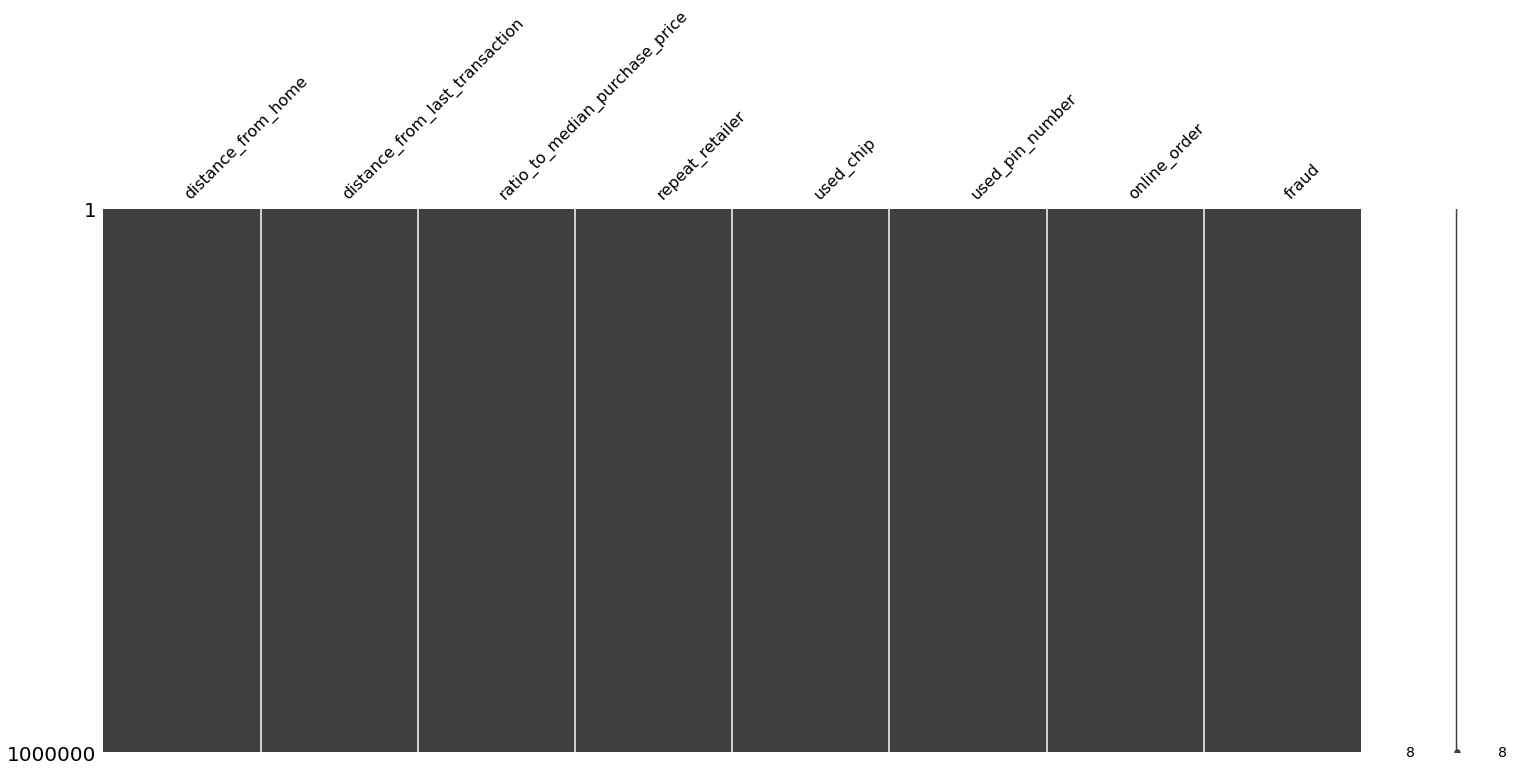

In [6]:
# Verificamos la existencia de datos "Nan" gráficamente.
#============================================================================================================

msno.matrix(df_fraude_creditcard)

A partir de este gráfico, podemos vemos que el dataset no tiene valores Nan, ya que no hay espacios blancos. 

Tener en cuenta que:
    
    Blanco: sin valores o Nan
    Negro: con valores

In [7]:
# Analizamos el tipo de dato
#============================================================================================================

df_fraude_creditcard.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [8]:
# Analizamos los valores unicos de las variables que en principio parecen tener datos binarios
#============================================================================================================

df_fraude_creditcard['repeat_retailer'].unique()

array([1., 0.])

In [9]:
df_fraude_creditcard['used_chip'].unique()

array([1., 0.])

In [10]:
df_fraude_creditcard['used_pin_number'].unique()

array([0., 1.])

In [11]:
df_fraude_creditcard['online_order'].unique()

array([0., 1.])

In [12]:
df_fraude_creditcard['fraud'].unique()

array([0., 1.])

**Conclusión del análisis:** Tal como se puede ver en las variables analizadas, todas ellas tienen datos binarios. Podrían transformarse en variables categóricas, pero por ahora mantendremos su tipo para un mejor análisis.

In [13]:
# Realizamos un análisis de las principales medidas estadísticas 
#============================================================================================================

df_fraude_creditcard.describe().round(2)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.0,1000000.00,1000000.00
mean,26.63,5.04,1.82,0.88,0.35,0.1,0.65,0.09
std,65.39,25.84,2.80,0.32,0.48,0.3,0.48,0.28
min,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
25%,3.88,0.30,0.48,1.00,0.00,0.0,0.00,0.00
50%,9.97,1.00,1.00,1.00,0.00,0.0,1.00,0.00
75%,25.74,3.36,2.10,1.00,1.00,0.0,1.00,0.00
max,10632.72,11851.10,267.80,1.00,1.00,1.0,1.00,1.00


**Conclusión del análisis:** Se puede observar que en las 2 primeras variables, hay mucha distancia entre el mínimo y el máximo. En este sentido, la mediana o el 2° quartil están muy alejado del valor máximo, lo que en prinicpio nos que pueden existir muchos outsider.   

**ANÁLISIS UNIVARIADO**

***1°: Análisis de frecuencias de las variables binarias con el método Sidetable***

In [14]:
# Realizamos un análisis de frecuencia de las variables con valores binarios
#============================================================================================================

df_fraude_creditcard.stb.freq(['repeat_retailer']).round(2)

,repeat_retailer,count,percent,cumulative_count,cumulative_percent
0,1.0,881536,88.15,881536,88.15
1,0.0,118464,11.85,1000000,100.00


In [15]:
df_fraude_creditcard.stb.freq(['used_chip']).round(2)

,used_chip,count,percent,cumulative_count,cumulative_percent
0,0.0,649601,64.96,649601,64.96
1,1.0,350399,35.04,1000000,100.00


In [16]:
df_fraude_creditcard.stb.freq(['used_pin_number']).round(2)

,used_pin_number,count,percent,cumulative_count,cumulative_percent
0,0.0,899392,89.94,899392,89.94
1,1.0,100608,10.06,1000000,100.00


In [17]:
df_fraude_creditcard.stb.freq(['online_order']).round(2)

,online_order,count,percent,cumulative_count,cumulative_percent
0,1.0,650552,65.06,650552,65.06
1,0.0,349448,34.94,1000000,100.00


In [18]:
df_fraude_creditcard.stb.freq(['fraud']).round(2)

,fraud,count,percent,cumulative_count,cumulative_percent
0,0.0,912597,91.26,912597,91.26
1,1.0,87403,8.74,1000000,100.00


**Conclusión del análisis:** Se puede ver que del total de transacciones solo el 35% se realizan con tarjetas de crédito. Por otra parte, solo el 10% lo usan introduciendo un código de seguridad. También es impornatet destacar que, el 65% son transacciones online. Finalmente, solo en el 9% de las transacciones se detectó fraude.

***2°: Análisis de la variable "distance_from_home" con un gráfico de caja***

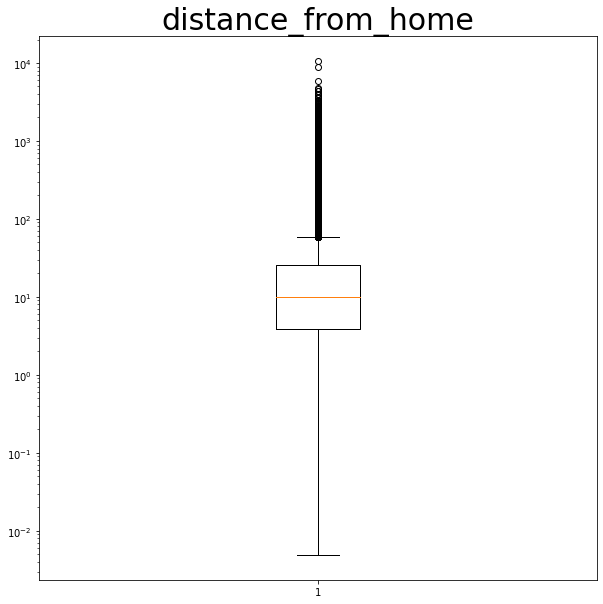

In [19]:
# Realizamos un boxplot utilizando matplotlib. Para una mejor compresión de los datos se estableció una escala logarítmica
#=========================================================================================================================

plt.figure(figsize=(10,10))
plt.boxplot(df_fraude_creditcard["distance_from_home"])
plt.title("distance_from_home", fontsize=30)
plt.yscale("log")
plt.show()

***Conclusión del análisis:*** como se observa, existen muchos valores outsider, lo cual debemos prestar atención para que no afecten los resultados del modelo de ML.

***3°: Análisis de la variable "distance_from_home" con un histograma***

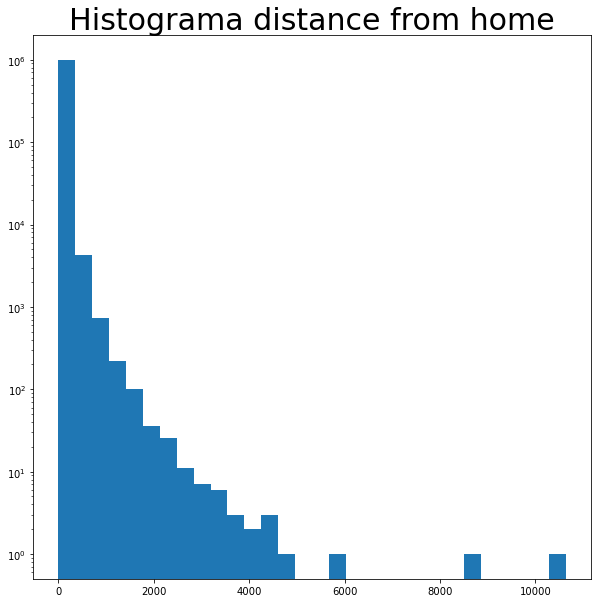

In [20]:
# Realizamos un histograma utilizando matplotlib. Para una mejor compresión de los datos se estableció una escala logarítmica
#============================================================================================================================

plt.figure(figsize=(10,10))
plt.hist(df_fraude_creditcard["distance_from_home"], bins=30)
plt.title("Histograma distance from home", fontsize=30)
plt.yscale("log")
plt.show()

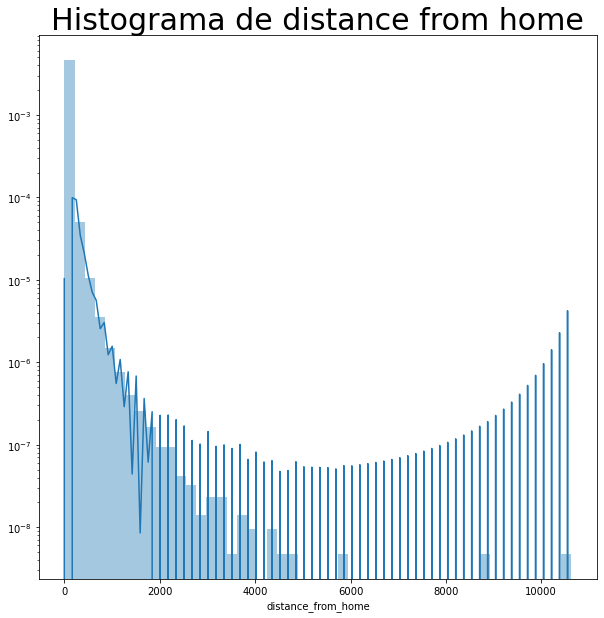

In [21]:
# Realizamos un histograma utilizando seaborn. Para una mejor compresión de los datos se estableció una escala logarítmica
#=========================================================================================================================

plt.figure(figsize=(10,10))
sns.distplot(df_fraude_creditcard["distance_from_home"])
plt.title("Histograma de distance from home", fontsize=30)
plt.yscale("log")
plt.show()

**Conclusión del análisis:** como se observa, la variable analizada presenta una distribución asimétrica a la izquierda.

**ANÁLISIS BIVARIADO**

***1°: Definir un dataframe de correlaciones***

In [22]:
# Definimos un dataframe que muestra las correlaciones a través del método "corr"
#============================================================================================================

df_corr = df_fraude_creditcard.corr()
df_corr

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


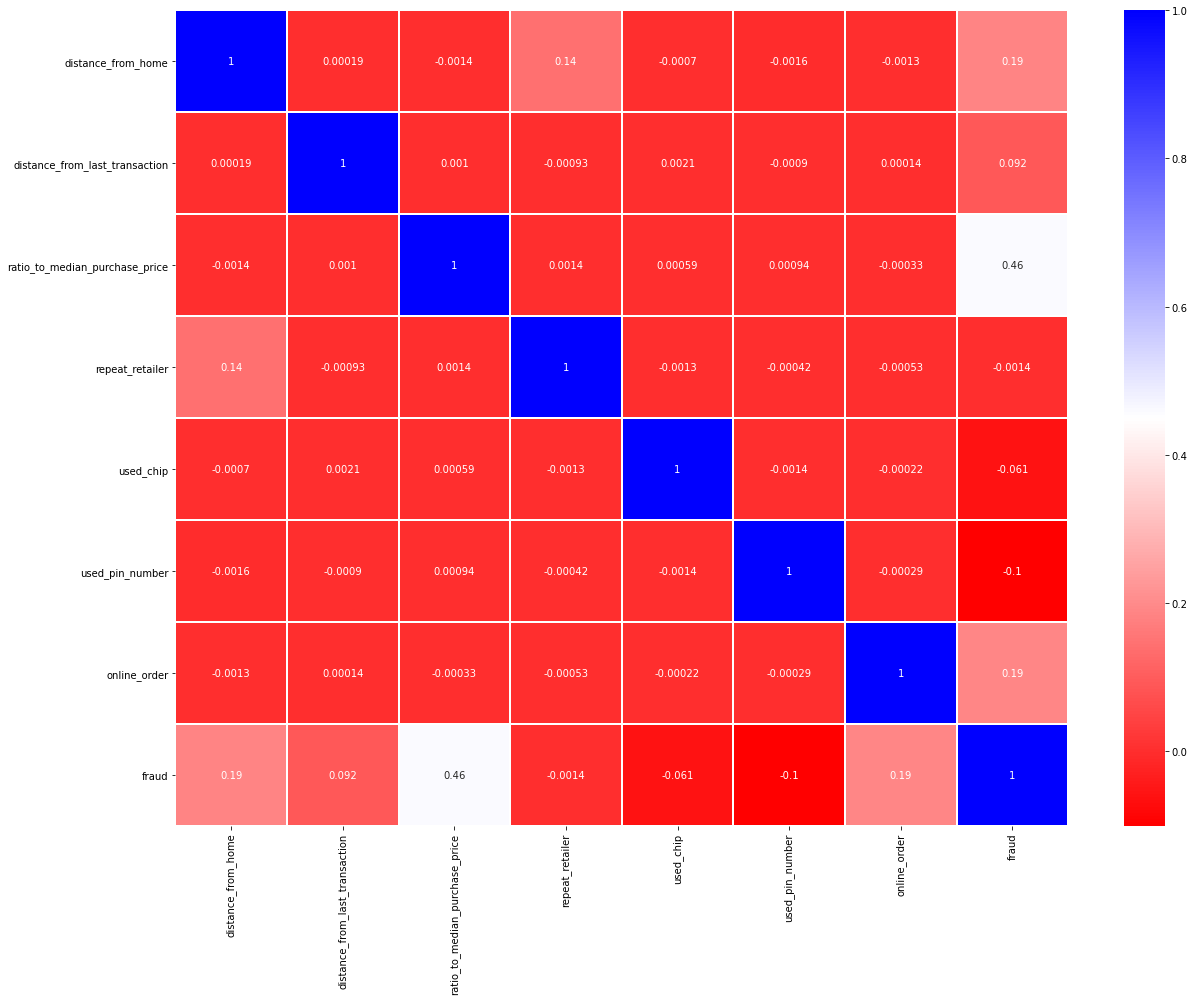

In [23]:
# Realizamos un heatmap utilizando seaborn.
#=========================================================================================================================

plt.figure(figsize=(20,15))
cor = df_corr
sns.heatmap(cor, annot=True, cmap="bwr_r" , linewidths=.4)
plt.show()


**Conclusión del análisis:** De acuerdo al gráfico, se puede observar que hay una baja correlación o no existe correlación entre las variables.

In [24]:
# Analizamos el sesgo de las variables.
#============================================================================================================

df_fraude_creditcard.skew()

distance_from_home                 20.239733
distance_from_last_transaction    125.921226
ratio_to_median_purchase_price      8.915015
repeat_retailer                    -2.361310
used_chip                           0.627134
used_pin_number                     2.655457
online_order                       -0.631517
fraud                               2.921824
dtype: float64

**Conclusión del análisis:** existen muchos sesgo en las variables. 

**ANÁLISIS MULTIVARIADO**

C:\Users\Pablo\miniconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


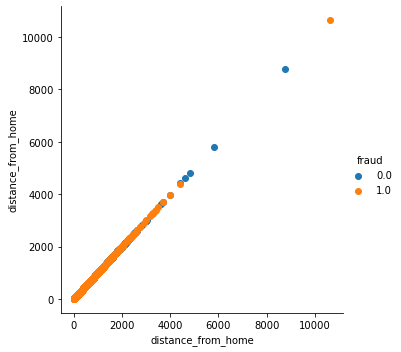

In [25]:
# Realizamos un facegrid utilizando seaborn. 
#====================================================================================================================================

sns.FacetGrid(df_fraude_creditcard,hue = 'fraud' , size = 5).map(plt.scatter,'distance_from_home','distance_from_home').add_legend();
plt.show()

**Conclusión del análisis:** se puede observar, en principio, que la distancia de la casa donde se realizó una transacción, no tiene relación con el fraude.   

C:\Users\Pablo\miniconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


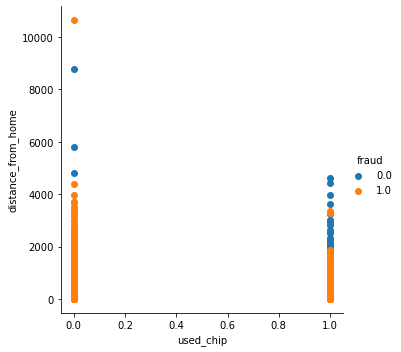

In [26]:
# Realizamos un facegrid utilizando seaborn. 
#===========================================================================================================================

sns.FacetGrid(df_fraude_creditcard,hue = 'fraud' , size = 5).map(plt.scatter,'used_chip','distance_from_home').add_legend();
plt.show()

**Conclusión del análisis:** se puede observar que la mayor cantidad de fraude se comete en transacciones que no se realizan con chip.

In [27]:
 df_fraude_creditcard.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


# Machine Learning 

Para nuestro trabajo de ML, vamos a trabajar con distintos modelos, tomando como referencia Logistic Regression:
        
      MODELO LINEAL   
      Logistic Regression
      Ridge Classifier
      
      MODELO TREE
      Decision Tree Classifier
      
      MODELO ENSEMBLE
      Random Forest Classifier
      XGBoost Classifier
      Cat Boost Classifier
      LightBoost Classifier

      MODELO NEIGHBORS  
      KNeighbors Classifier
      Nearest Centroid

Para la ejecución de cada modelo vamos a utilizar la estrategia StratifiedKFold para finalizar con la Optimización Bayesiana.
Por último vamos a utilizar la metrica Recall, ya que se trata de un ejercicio de Fraude.

***1°: Working with variable X***

In [28]:
# Define the X features dataframe
#=============================================================================================================================

X = df_fraude_creditcard.iloc[:, :-1].copy(deep=True)
X.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0


In [29]:
# Verify the symmetries
#=============================================================================================================================

X.skew()

distance_from_home                 20.239733
distance_from_last_transaction    125.921226
ratio_to_median_purchase_price      8.915015
repeat_retailer                    -2.361310
used_chip                           0.627134
used_pin_number                     2.655457
online_order                       -0.631517
dtype: float64

In [30]:
#Initialize the transformers
#=============================================================================================================================

nrm_transformer = Normalizer()
pow_transformer = PowerTransformer()

In [31]:
#Initialize the instances for the transformations: because of having the information to biased, we did 3 concatenated transformations.
#=============================================================================================================================

X = quantile_transform(X)
X = nrm_transformer.fit_transform(X)
X = pow_transformer.fit_transform(X)

In [32]:
# Final X Dataframe
#=============================================================================================================================

X = pd.DataFrame(X)
X.head(10)

,0,1,2,3,4,5,6
0,1.240528,-0.894970,0.611779,-0.059923,1.374333,-0.334458,-1.288936
1,0.755870,-0.965166,0.955294,1.777342,-0.733769,-0.334458,-1.288936
2,-0.497320,0.057780,-0.875627,0.695266,-0.733769,-0.334458,1.068437
3,-1.366935,0.790733,-1.222473,-0.214983,1.346379,-0.334458,0.475452
4,0.759168,-0.647822,0.440161,-0.458179,1.293084,-0.334458,0.297276
5,-0.266835,1.862996,-1.867523,1.181196,-0.733769,-0.334458,-1.288936
6,-0.803030,0.216744,-1.305133,0.735166,-0.733769,-0.334458,1.092320
7,-0.590308,-0.721692,0.486155,0.541406,-0.733769,2.990136,-1.288936
8,-1.583068,2.163710,1.960722,-1.997972,-0.733769,-0.334458,-1.288936
9,-0.194239,0.624795,0.779359,-0.039567,-0.733769,-0.334458,0.598001


In [33]:
# Verify the symmetries again
#=============================================================================================================================

X.skew()

0   -0.023270
1    0.004319
2    0.004342
3    0.046146
4    0.632974
5    2.655457
6   -0.223508
dtype: float64

**Conclusion**: although we did the data transformation, the "used_pin_number" variable continuos biased.

***2°: Working with variable "target"***

In [34]:
# Define the target variable
#=============================================================================================================================

y = df_fraude_creditcard["fraud"].copy(deep=True)
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
999995    0.0
999996    0.0
999997    0.0
999998    0.0
999999    0.0
Name: fraud, Length: 1000000, dtype: float64

***3°: Initialize the models***

In [35]:
# Initialize the models
#=============================================================================================================================

clf = DecisionTreeClassifier()
rfc = RandomForestClassifier()

bst = XGBClassifier()
ctb = CatBoostClassifier()
lgh = LGBMClassifier()

knn = KNeighborsClassifier()
knc = NearestCentroid()

lgr = LogisticRegression()
rdc = RidgeClassifier()

# StratifiedKFold

In [36]:
#Precarga de Datos para entrenamiento y modelado

X = df_fraude_creditcard.iloc[:, :-1].copy(deep=True)
nrm_transformer = Normalizer()
pow_transformer = PowerTransformer()

X = quantile_transform(X)
X = nrm_transformer.fit_transform(X)
X = pow_transformer.fit_transform(X)
y = df_fraude_creditcard["fraud"].copy(deep=True)

In [37]:
#Ejecucion de Stratified

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf.get_n_splits(X, y)

10

In [38]:
print(skf)


StratifiedKFold(n_splits=10, random_state=0, shuffle=True)


In [39]:
#Aplicacion Basica del Modelo

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]    

TRAIN: [     0      1      2 ... 999997 999998 999999] TEST: [     5      7      9 ... 999949 999959 999965]
TRAIN: [     0      3      4 ... 999995 999998 999999] TEST: [     1      2     10 ... 999992 999996 999997]
TRAIN: [     0      1      2 ... 999997 999998 999999] TEST: [    14     23     24 ... 999960 999966 999977]
TRAIN: [     0      1      2 ... 999996 999997 999998] TEST: [    11     16     17 ... 999993 999994 999999]
TRAIN: [     1      2      4 ... 999996 999997 999999] TEST: [     0      3     22 ... 999989 999990 999998]
TRAIN: [     0      1      2 ... 999997 999998 999999] TEST: [    25     39     53 ... 999963 999972 999982]
TRAIN: [     0      1      2 ... 999997 999998 999999] TEST: [     8     20     21 ... 999976 999983 999991]
TRAIN: [     0      1      2 ... 999997 999998 999999] TEST: [    13     36     42 ... 999952 999964 999981]
TRAIN: [     0      1      2 ... 999997 999998 999999] TEST: [     6     12     32 ... 999979 999987 999988]
TRAIN: [     0     

In [40]:
# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)

# Decision Tree Classifier

In [41]:
lst_metric_stratified_clf  = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    clf.fit(x_train_fold, y_train_fold)
    lst_metric_stratified_clf.append(recall_score(y_test, clf.predict(X_test)))

lst_metric_stratified_clf

[0.7725660679556114,
 0.7892689623612859,
 0.7522022651870496,
 0.751973458414369,
 0.7584944514357626,
 0.7462532890973573,
 0.7579224345040613,
 0.7741677153643748,
 0.7502574076192655,
 0.6893948060862601]

# Random Forest

In [42]:
lst_metric_stratified_rfc  = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    rfc.fit(x_train_fold, y_train_fold)
    lst_metric_stratified_rfc.append(recall_score(y_test, rfc.predict(X_test)))

lst_metric_stratified_rfc

[0.6551881935705297,
 0.6339091637112458,
 0.6116005033748999,
 0.6021050223086604,
 0.5944399954238645,
 0.6469511497540327,
 0.6519848987530031,
 0.6205239675094383,
 0.6391717194828966,
 0.5958128360599474]

# XGBOOST

In [43]:
lst_metric_stratified_bst  = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    bst.fit(x_train_fold, y_train_fold)
    lst_metric_stratified_bst.append(recall_score(y_test, bst.predict(X_test)))

lst_metric_stratified_bst


[0.7915570300880906,
 0.7682187392746825,
 0.7439652213705525,
 0.6157190252831484,
 0.7978492163368036,
 0.7668458986385998,
 0.7873241047935019,
 0.6856194943370324,
 0.7713076307058689,
 0.8019677382450521]

# CatBoost

In [44]:
lst_metric_stratified_ctb  = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    ctb.fit(x_train_fold, y_train_fold)
    lst_metric_stratified_ctb.append(recall_score(y_test, ctb.predict(X_test)))

lst_metric_stratified_ctb

Learning rate set to 0.188103
0:	learn: 0.3887851	total: 230ms	remaining: 3m 49s
1:	learn: 0.2594012	total: 301ms	remaining: 2m 30s
2:	learn: 0.1946541	total: 375ms	remaining: 2m 4s
3:	learn: 0.1528624	total: 445ms	remaining: 1m 50s
4:	learn: 0.1345971	total: 524ms	remaining: 1m 44s
5:	learn: 0.1249733	total: 592ms	remaining: 1m 38s
6:	learn: 0.1141196	total: 667ms	remaining: 1m 34s
7:	learn: 0.1097041	total: 743ms	remaining: 1m 32s
8:	learn: 0.1029957	total: 813ms	remaining: 1m 29s
9:	learn: 0.0990731	total: 885ms	remaining: 1m 27s
10:	learn: 0.0905484	total: 960ms	remaining: 1m 26s
11:	learn: 0.0870411	total: 1.03s	remaining: 1m 24s
12:	learn: 0.0840841	total: 1.1s	remaining: 1m 23s
13:	learn: 0.0817346	total: 1.18s	remaining: 1m 22s
14:	learn: 0.0790672	total: 1.25s	remaining: 1m 21s
15:	learn: 0.0767783	total: 1.32s	remaining: 1m 21s
16:	learn: 0.0746148	total: 1.4s	remaining: 1m 20s
17:	learn: 0.0706370	total: 1.47s	remaining: 1m 20s
18:	learn: 0.0693471	total: 1.54s	remaining: 1m

[0.5808259924493765,
 0.6053083171261869,
 0.5997025511955154,
 0.6234984555542844,
 0.6069099645349503,
 0.6666285322045532,
 0.7343553369179727,
 0.6075963848529916,
 0.6025626358540213,
 0.6047363001944858]

# Lightboots

In [45]:
lst_metric_stratified_lgh = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lgh.fit(x_train_fold, y_train_fold)
    lst_metric_stratified_lgh.append(recall_score(y_test, lgh.predict(X_test)))

lst_metric_stratified_lgh

[0.628188994394234,
 0.5341494108225604,
 0.5466193799336461,
 0.49536666285322045,
 0.49056172062693054,
 0.5638942912710216,
 0.5303740990733325,
 0.5468481867063265,
 0.5301452923006521,
 0.5981009037867521]

# Nearest Neighbors Classification (KNN)

In [46]:
lst_metric_stratified_knn  = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    knn.fit(x_train_fold, y_train_fold)
    lst_metric_stratified_knn.append(recall_score(y_test, knn.predict(X_test)))

lst_metric_stratified_knn

[0.48827365290012587,
 0.4865576021050223,
 0.47877817183388627,
 0.49468024253517906,
 0.49525225946688023,
 0.48129504633337145,
 0.4875872325820844,
 0.4846127445372383,
 0.48518476146893946,
 0.48964649353620865]

# Nearest Centroid Classifier (KNC)

In [47]:
lst_metric_stratified_knc  = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    knc.fit(x_train_fold, y_train_fold)
    lst_metric_stratified_knc.append(recall_score(y_test, knc.predict(X_test)))

lst_metric_stratified_knc

[0.9032147351561606,
 0.9027571216107997,
 0.9029859283834801,
 0.9025283148381192,
 0.9032147351561606,
 0.9025283148381192,
 0.90287152499714,
 0.9019562979064181,
 0.9025283148381192,
 0.9021851046790985]

# Logistic regression

In [48]:
lst_metric_stratified_lgr  = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lgr.fit(x_train_fold, y_train_fold)
    lst_metric_stratified_lgr.append(recall_score(y_test, lgr.predict(X_test)))

lst_metric_stratified_lgr

[0.4855279716279602,
 0.4840407276055371,
 0.48426953437821757,
 0.4848415513099188,
 0.48449834115089807,
 0.48335430728749573,
 0.4840407276055371,
 0.48312550051481523,
 0.484955954696259,
 0.4826678869694543]

# Ridge Classifier (rdc)

In [49]:
lst_metric_stratified_rdc = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    rdc.fit(x_train_fold, y_train_fold)
    lst_metric_stratified_rdc.append(recall_score(y_test, rdc.predict(X_test)))

lst_metric_stratified_rdc

[0.2459672806315067,
 0.24550966708614574,
 0.24585287724516647,
 0.24848415513099187,
 0.2463104907905274,
 0.24459443999542385,
 0.2466537009495481,
 0.2450520535407848,
 0.2459672806315067,
 0.24459443999542385]

# Analisis de Resultados

**List with name model**

In [146]:
name_model= ["Logistic regression","Ridge classifier","Decision Tree Classifier","Random Forest","XGBoost","CatBoost","LightBoost","KNN","KNC"]
name_model

['Logistic regression',
 'Ridge classifier',
 'Decision Tree Classifier',
 'Random Forest',
 'XGBoost',
 'CatBoost',
 'LightBoost',
 'KNN',
 'KNC']

**Dataframe with metric list**

In [147]:
df_score = pd.DataFrame(list(zip(
                                lst_metric_stratified_lgr,
                                lst_metric_stratified_rdc,
                                lst_metric_stratified_clf,
                                lst_metric_stratified_rfc,                            
                                lst_metric_stratified_bst,
                                lst_metric_stratified_ctb,
                                lst_metric_stratified_lgh,
                                lst_metric_stratified_knn,
                                lst_metric_stratified_knc
                                )),
                        
                        columns= name_model
                       )
df_score

,Logistic regression,Ridge classifier,Decision Tree Classifier,Random Forest,XGBoost,CatBoost,LightBoost,KNN,KNC
0,0.485528,0.245967,0.772566,0.655188,0.791557,0.580826,0.628189,0.488274,0.903215
1,0.484041,0.245510,0.789269,0.633909,0.768219,0.605308,0.534149,0.486558,0.902757
2,0.484270,0.245853,0.752202,0.611601,0.743965,0.599703,0.546619,0.478778,0.902986
3,0.484842,0.248484,0.751973,0.602105,0.615719,0.623498,0.495367,0.494680,0.902528
4,0.484498,0.246310,0.758494,0.594440,0.797849,0.606910,0.490562,0.495252,0.903215
5,0.483354,0.244594,0.746253,0.646951,0.766846,0.666629,0.563894,0.481295,0.902528
6,0.484041,0.246654,0.757922,0.651985,0.787324,0.734355,0.530374,0.487587,0.902872
7,0.483126,0.245052,0.774168,0.620524,0.685619,0.607596,0.546848,0.484613,0.901956
8,0.484956,0.245967,0.750257,0.639172,0.771308,0.602563,0.530145,0.485185,0.902528
9,0.482668,0.244594,0.689395,0.595813,0.801968,0.604736,0.598101,0.489646,0.902185


In [148]:
df_score.describe()

,Logistic regression,Ridge classifier,Decision Tree Classifier,Random Forest,XGBoost,CatBoost,LightBoost,KNN,KNC
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.484132,0.245899,0.754250,0.625169,0.753037,0.623212,0.546425,0.487187,0.902677
std,0.000886,0.001140,0.026427,0.023359,0.058973,0.044951,0.042246,0.005218,0.000414
min,0.482668,0.244594,0.689395,0.594440,0.615719,0.580826,0.490562,0.478778,0.901956
25%,0.483526,0.245166,0.750686,0.604479,0.749685,0.603106,0.530202,0.484756,0.902528
50%,0.484155,0.245910,0.755062,0.627217,0.769763,0.606109,0.540384,0.487072,0.902643
75%,0.484756,0.246225,0.769048,0.645006,0.790499,0.619523,0.559633,0.489303,0.902957
max,0.485528,0.248484,0.789269,0.655188,0.801968,0.734355,0.628189,0.495252,0.903215


**Maxime values for each models**

In [53]:
value_max = df_score.max()
print(value_max.sort_values(ascending=False))

KNC                         0.903215
XGBoost                     0.801968
Decision Tree Classifier    0.789269
CatBoost                    0.734355
Random Forest               0.655188
LightBoost                  0.628189
KNN                         0.495252
Logistic regression         0.485528
Ridge classifier            0.248484
dtype: float64


**Boxplot with model**

In [54]:
# Conventir en array el df
#=============================================================================================================================

array_df_score = df_score.to_numpy()
array_df_score

array([[0.77256607, 0.65518819, 0.79155703, 0.58082599, 0.62818899,
        0.48827365, 0.90321474, 0.48552797, 0.24596728],
       [0.78926896, 0.63390916, 0.76821874, 0.60530832, 0.53414941,
        0.4865576 , 0.90275712, 0.48404073, 0.24550967],
       [0.75220227, 0.6116005 , 0.74396522, 0.59970255, 0.54661938,
        0.47877817, 0.90298593, 0.48426953, 0.24585288],
       [0.75197346, 0.60210502, 0.61571903, 0.62349846, 0.49536666,
        0.49468024, 0.90252831, 0.48484155, 0.24848416],
       [0.75849445, 0.59444   , 0.79784922, 0.60690996, 0.49056172,
        0.49525226, 0.90321474, 0.48449834, 0.24631049],
       [0.74625329, 0.64695115, 0.7668459 , 0.66662853, 0.56389429,
        0.48129505, 0.90252831, 0.48335431, 0.24459444],
       [0.75792243, 0.6519849 , 0.7873241 , 0.73435534, 0.5303741 ,
        0.48758723, 0.90287152, 0.48404073, 0.2466537 ],
       [0.77416772, 0.62052397, 0.68561949, 0.60759638, 0.54684819,
        0.48461274, 0.9019563 , 0.4831255 , 0.24505205],


In [110]:
# Conventir en array the reference model 
#=============================================================================================================================

array_df_score_lgr = df_score['Logistic regression'].to_numpy()
array_df_score_lgr

array([0.48552797, 0.48404073, 0.48426953, 0.48484155, 0.48449834,
       0.48335431, 0.48404073, 0.4831255 , 0.48495595, 0.48266789])

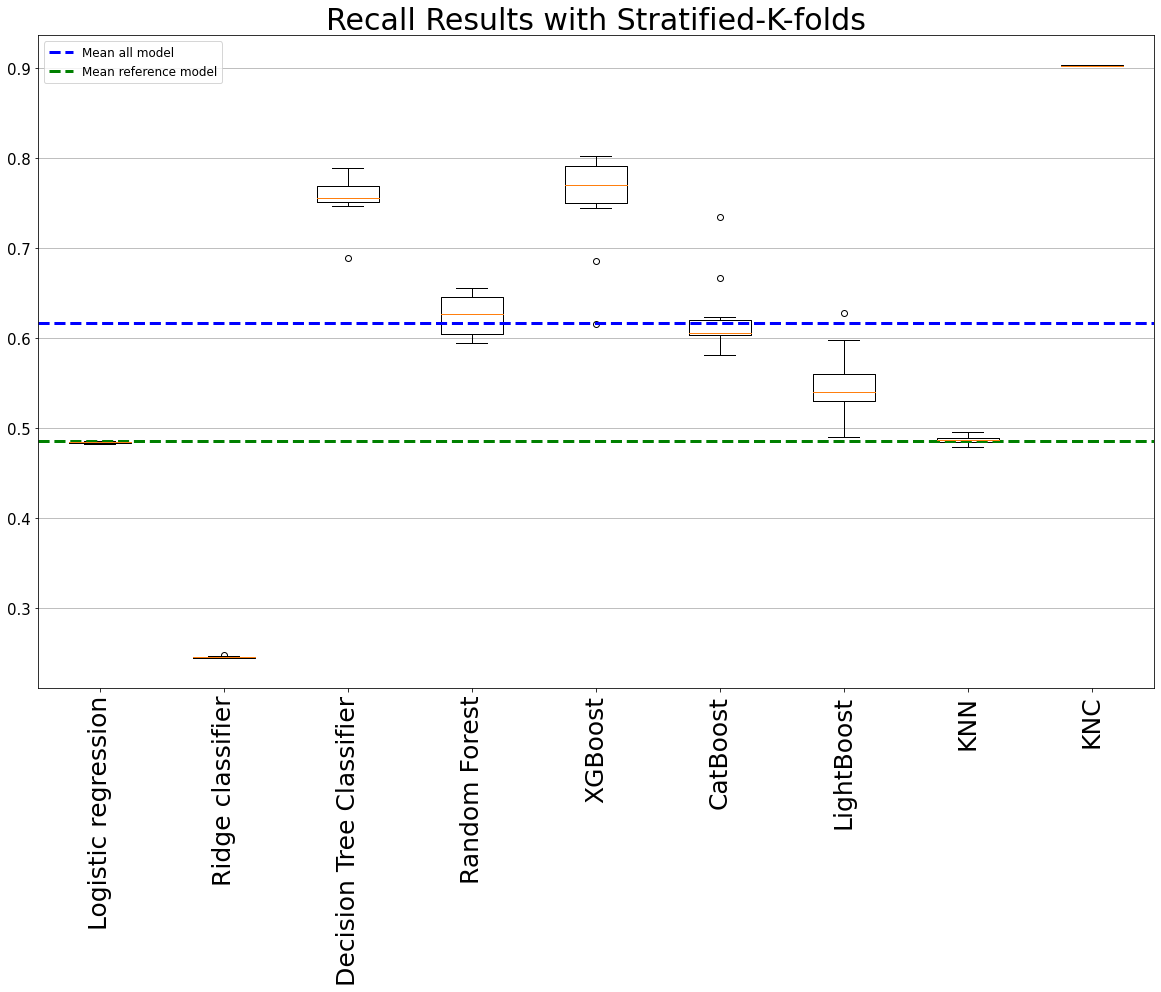

In [167]:
# Boxplot the models and your mean
#=============================================================================================================================

plt.figure(figsize=(20,12))
plt.title('Recall Results with Stratified-K-folds', fontsize=30)
plt.boxplot(df_score, labels=name_model)

plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=15)

plt.axhline(y=np.mean(array_df_score[0]), label='Mean all model', color="blue", ls='--', lw=3)
plt.axhline(y=np.mean(array_df_score_lgr[0]), label='Mean reference model', color="green", ls='--', lw=3)
plt.legend(loc='upper left', fontsize=12)
plt.grid(axis='y')
plt.show()

**Conslusion:** Al observar Recall Results with Stratified-K-folds, calculamos la media de nuestra modelo de referencia (Logistic Regression), y se puede ver que, salvo el Ridge Classifier model, todos los otros modelos tienen mejor score. Es por ello, que decidimos calcular la media de todos los resultados de los modelos seleccionados. Con estos dos análisis, seleccionamos un modelo por cada familia de modelo:
    
    1. Logistic Regression
    2. XGBoost
    3. Decision Tree Classifier
    4. KNC
    
En el siguiente paso, se analizará los tiempos de estos modelos, a traves del Learning Curve.

# Learning curve

In [143]:
def plot_learning_curve(
                        estimator,
                        title,
                        X,
                        y,
                        axes=None,
                        ylim=None,
                        cv=None,
                        n_jobs=None,
                        scoring=None,
                        train_sizes=np.linspace(0.1, 1.0, 5)
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("Fit_times")
    axes[2].set_ylabel("Recall")
    axes[2].set_title("Performance of the model")

    return plt

C:\Users\Pablo\miniconda3\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:163: UserWarning:

Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.

C:\Users\Pablo\miniconda3\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:163: UserWarning:

Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.

C:\Users\Pablo\miniconda3\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:163: UserWarning:

Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.

C:\Users\Pablo\miniconda3\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:163: UserWarning:

Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.

C:\Users\Pablo\miniconda3\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:163: UserWarning:

Averaging for metrics other than euclidean and manhattan n

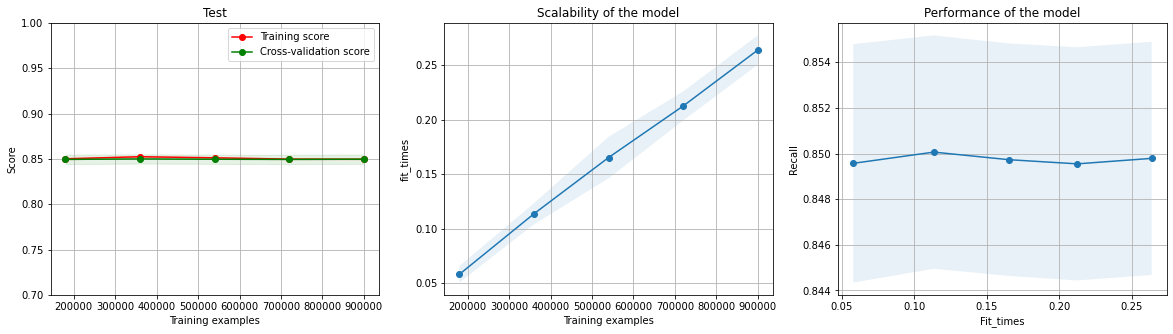

In [144]:
plot_learning_curve(knc, "Test", X, y, train_sizes=np.linspace(0.2, 1.0, 5), scoring='recall', cv=skf , ylim=(0.7, 1))
plt.show()

[21:30:07] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:30:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:31:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  Thi

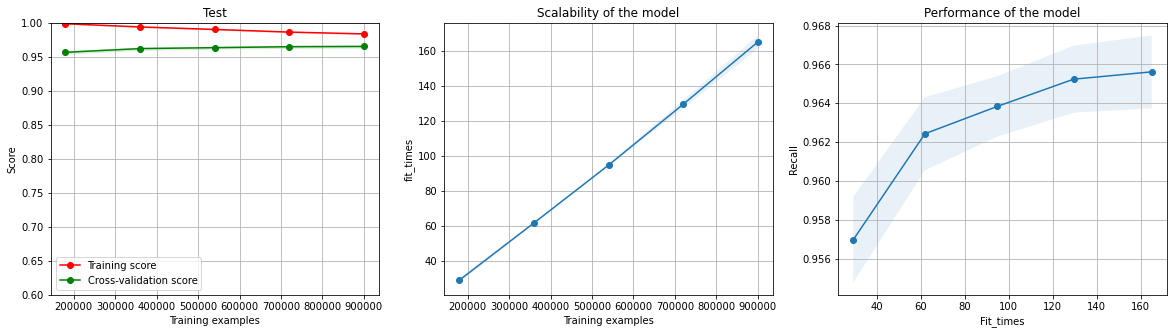

In [145]:
plot_learning_curve(bst, "Test", X, y, train_sizes=np.linspace(0.2, 1.0, 5), scoring='recall', cv=skf, ylim=(0.6, 1))
plt.show()

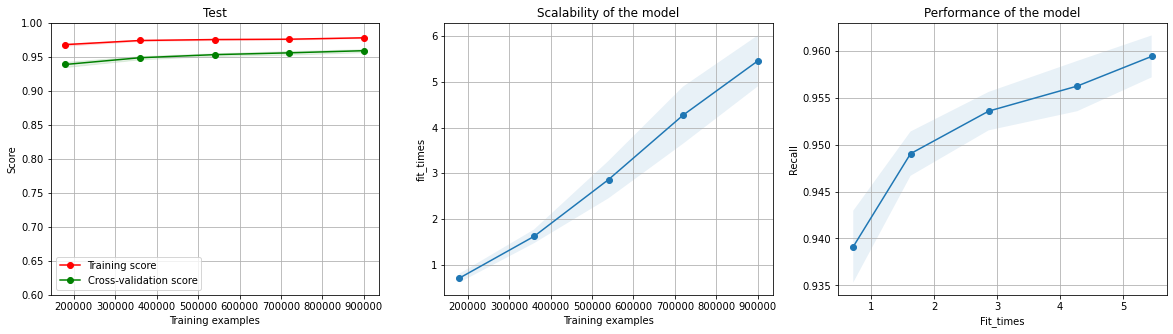

In [158]:
plot_learning_curve(clf, "Test", X, y, train_sizes=np.linspace(0.2, 1.0, 5), scoring='recall', cv=skf, ylim=(0.6, 1))
plt.show()

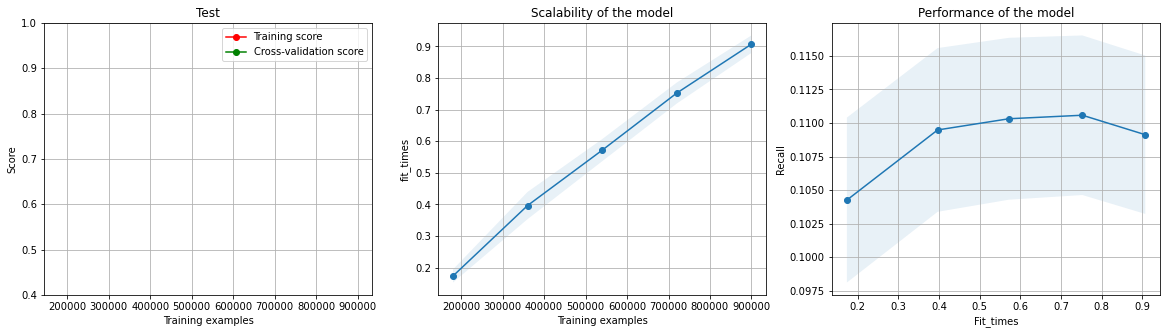

In [168]:
plot_learning_curve(lgr, "Test", X, y, train_sizes=np.linspace(0.2, 1.0, 5), scoring='recall', cv=skf, ylim=(0.4, 1))
plt.show()

**Conclusion:** Se puede observar que, el KNC model resulto ser el más económico en termino de tiempo de ejecución y con los mejores resultados de los modelos seleccionados, mientras que el XGBoost fue el más caro con el segundo mejor resultado. El reference model, resultó económico pero con los resultados más bajos.  

# Score model selections

In [227]:
# Score the reference model 
#=============================================================================================================================

ref_score_lgr = df_score['Logistic regression'].max()
ref_score_lgr

0.4855279716279602

In [228]:
# Score the model KNC
#=============================================================================================================================

score_knc = df_score['KNC'].max()
score_knc

0.9032147351561606

In [229]:
# Score the model Decision Tree Classifier
#=============================================================================================================================

score_clf = df_score['Decision Tree Classifier'].max()
score_clf

0.7892689623612859

In [230]:
# Score the model XGBoost
#=============================================================================================================================

score_bst = df_score['XGBoost'].max()
score_bst

0.8019677382450521